In [1]:
from mpl_toolkits.basemap import Basemap
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.collections import LineCollection

rcParams['figure.facecolor'] = 'white'
rcParams['figure.dpi'] = 100
rcParams['savefig.dpi'] = 100

In [2]:
def country(countries, bmap, fc=None, ec='none', lw=1, adm=0, gadmpath='data/TravelMap/'):
    """Colour <countries> with a <bmap> projection.

    bmap : handle
        As you get from bmap = Basemap().
    fc : None or colour; <None>
        Face-colour for country; if <None>, it will cycle through colour-cycle.
    ec : 'none' or colour; <'none'>
        Edge-colour for country.
    lw : scalar; <1>
        Linewidth for country.
    adm : {0, 1, 2, 3}; <0>
        Administrative area to choose.
    gadmpath : 'string'
        Absolut or relative path to shapefiles.
    """

    # Ensure countries is a list
    if not isinstance(countries, list):
        countries = [countries,]
        
    # Get current axis
    cax = plt.gca()

    # Loop through the countries
    for country in countries:
    
        # Get shapefile for the country; extract shapes and records
        r = shapefile.Reader(gadmpath+country+'_adm/'+country+'_adm'+str(adm))
        shapes = r.shapes()
        records = r.records()

        # Loop through the records; for adm0 this is only 1 run
        for record, shape in zip(records,shapes):
            lons,lats = zip(*shape.points)
            data = np.array(bmap(lons, lats)).T

            if len(shape.parts) == 1:
                segs = [data,]
            else:
                segs = []
                for i in range(1,len(shape.parts)):
                    index = shape.parts[i-1]
                    index2 = shape.parts[i]
                    segs.append(data[index:index2])
                segs.append(data[index2:])
            lines = LineCollection(segs,antialiaseds=(1,))
            
            # If facecolor is provided, use; else cycle through colours
            if fc:
                lines.set_facecolors(fc)
            else:
                lines.set_facecolors(next(cax._get_lines.color_cycle))

            # Edge colour and line width
            lines.set_edgecolors(ec)
            lines.set_linewidth(lw)

            # Add to current plot
            cax.add_collection(lines)

/home/dtr/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dtr/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


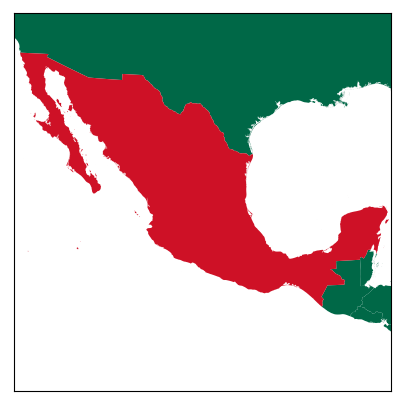

In [3]:
fig = plt.figure(figsize=(5,5))
m = Basemap(width=3100000, height=3100000, resolution='c',
              projection='tmerc', lat_0=22.5, lon_0=-101.3)
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
country(countries, m, fc='#006847', lw=0)
country('MEX', m, fc='#CE1126', lw=0)
m.plot(0,0)
plt.savefig('plots/favicon.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

In [4]:
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300

/home/dtr/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dtr/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


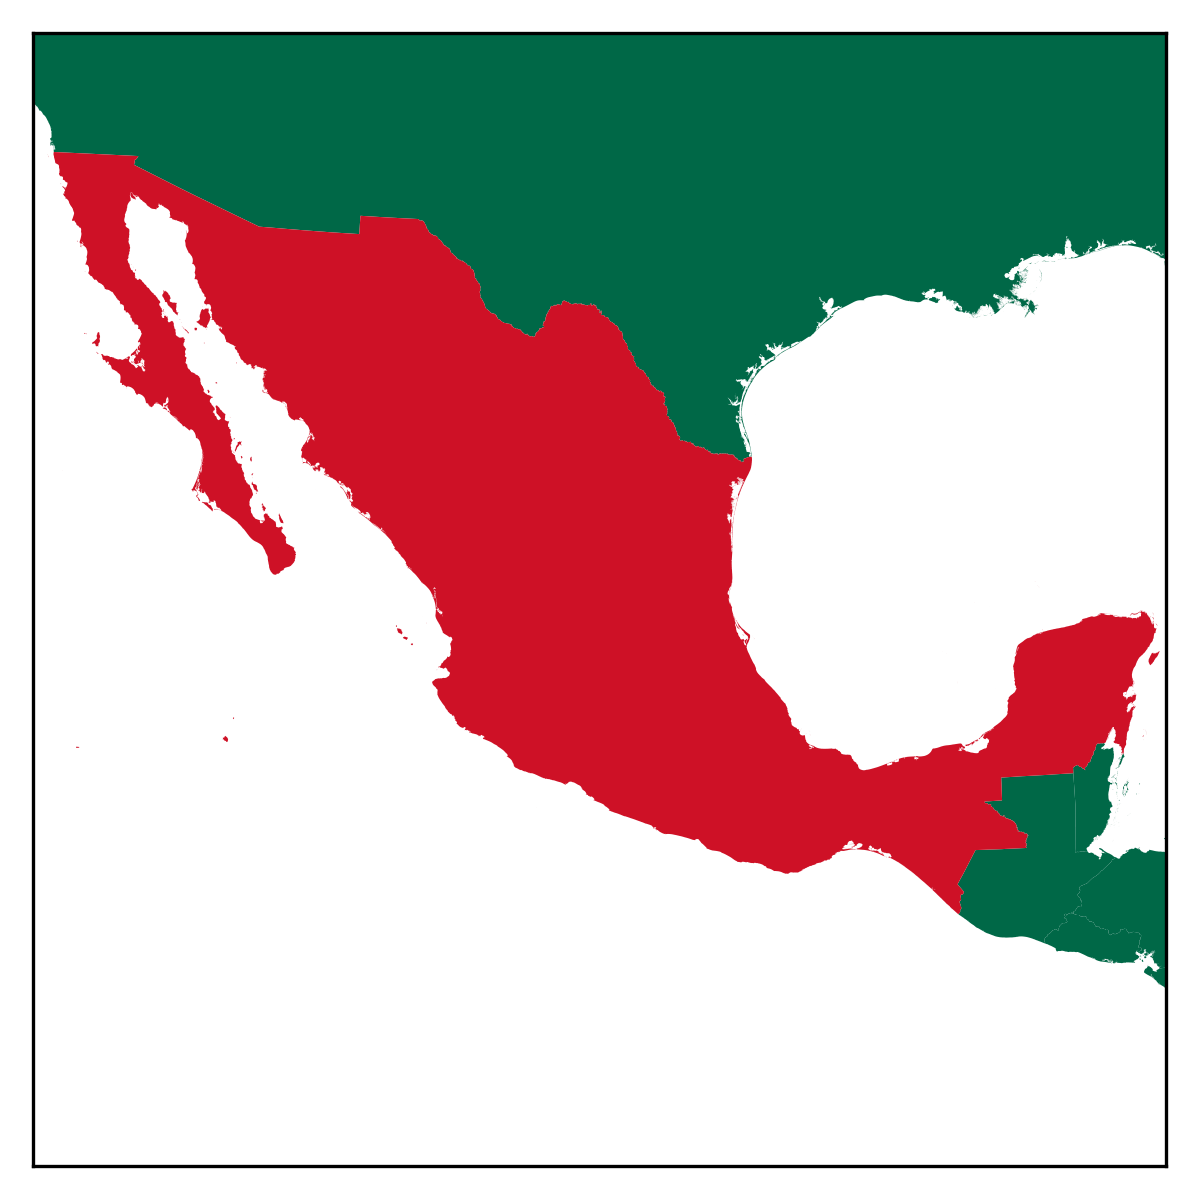

In [5]:
fig = plt.figure(figsize=(5,5))
m = Basemap(width=3100000, height=3100000, resolution='c',
              projection='tmerc', lat_0=22.5, lon_0=-101.3)
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
country(countries, m, fc='#006847', lw=0)
country('MEX', m, fc='#CE1126', lw=0)
m.plot(0,0)
plt.savefig('plots/favicon.jpg', bbox_inches='tight', pad_inches=0.02)
plt.show()